# K-Means Clustering#

# Steps
1. Define the number (K) of clusters to the split data.
2. Select K random points from the data.
3. Calculate the distance between each point and each centroid.
4. Assign each point to a centroid.
5. Calculate the center of each cluster.
6. Repeat steps 3-5 until it does not change.



In [49]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [50]:
df = pd.read_csv("force2020_data_unsupervised_learning.csv")


In [51]:
df.dropna(inplace=True)
df

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
4238,1.774626,55.892757,1138.704,0.765867,1.631495,147.837677
4239,1.800986,60.929138,1138.856,0.800262,1.645080,142.382431
4240,1.817696,62.117264,1139.008,0.765957,1.645873,138.258331
4241,1.829333,61.010860,1139.160,0.702521,1.620216,139.198914
4242,1.813854,58.501236,1139.312,0.639708,1.504854,144.290085
...,...,...,...,...,...,...
16435,2.468236,90.537521,2993.256,0.341534,4.699200,86.474564
16436,2.457519,88.819122,2993.408,0.351085,4.699200,86.187599
16437,2.429228,92.128922,2993.560,0.364982,4.699200,87.797836
16438,2.425479,95.870255,2993.712,0.367323,5.224292,88.108452


In [52]:
scaler = StandardScaler()

df[["RHOB_T", "GR_T", "DEPTH_MD_T", "NPHI_T", "PEF_T", "DTC_T"]] = scaler.fit_transform(df[["RHOB", "GR", "DEPTH_MD", "NPHI", "PEF", "DTC"]])
df #We make that to make the plot easier for us to read


,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC,RHOB_T,GR_T,DEPTH_MD_T,NPHI_T,PEF_T,DTC_T
4238,1.774626,55.892757,1138.704,0.765867,1.631495,147.837677,-1.491843,-0.179292,-1.731605,2.523654,-1.255364,0.869531
4239,1.800986,60.929138,1138.856,0.800262,1.645080,142.382431,-1.387067,-0.010859,-1.731322,2.770744,-1.247886,0.690042
4240,1.817696,62.117264,1139.008,0.765957,1.645873,138.258331,-1.320646,0.028875,-1.731038,2.524300,-1.247450,0.554350
4241,1.829333,61.010860,1139.160,0.702521,1.620216,139.198914,-1.274390,-0.008126,-1.730754,2.068584,-1.261572,0.585297
4242,1.813854,58.501236,1139.312,0.639708,1.504854,144.290085,-1.335919,-0.092056,-1.730470,1.617342,-1.325067,0.752808
...,...,...,...,...,...,...,...,...,...,...,...,...
16435,2.468236,90.537521,2993.256,0.341534,4.699200,86.474564,1.265151,0.979338,1.730512,-0.524699,0.433103,-1.149449
16436,2.457519,88.819122,2993.408,0.351085,4.699200,86.187599,1.222550,0.921870,1.730796,-0.456081,0.433103,-1.158891
16437,2.429228,92.128922,2993.560,0.364982,4.699200,87.797836,1.110101,1.032560,1.731080,-0.356250,0.433103,-1.105910
16438,2.425479,95.870255,2993.712,0.367323,5.224292,88.108452,1.095199,1.157682,1.731363,-0.339430,0.722114,-1.095690


In [53]:
# We now need to know how many clusters is optimal.

# Using Elbow method. It allows us to find the optimal number of clusters by measuring how well the data was clustered by the algorithm, that is inertia
# Elbow plot allows us to plot the inertia against the number of clusters; from this, we are going to see where our intertia begins to be slow, and conclude the nbr of clusters 

def optimum_kmeans (data, max_k):
    means = []
    inertias = []

    for k in range(1, max_k):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)

        # This simple function plot the inertias(sum of squared distance between points and centroid) as we run our kmeans algorithm multiples times
        # This will go to large dif between clusters to small dif between clusters

        means.append(k)
        inertias.append(kmeans.inertia_)
    
    # Elbow plot
    fig = plt.subplots(figsize=(10,5))
    plt.plot(means, inertias, '-x')
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.grid(True)
    plt.show()

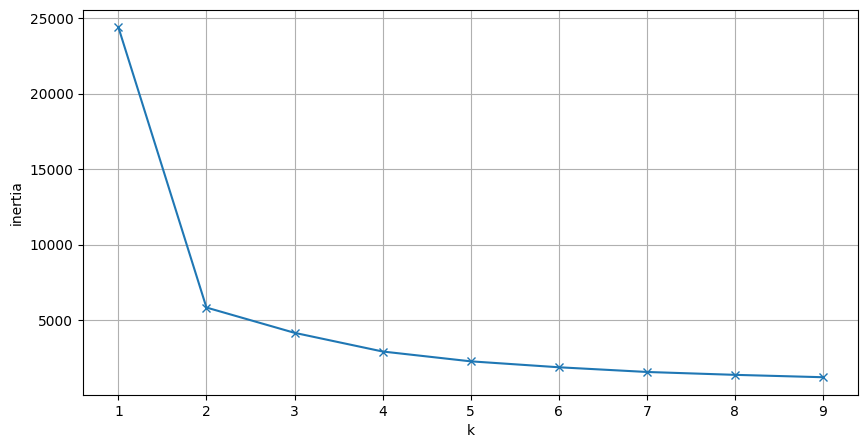

In [54]:
optimum_kmeans(df[["RHOB_T", "NPHI_T"]], 10)

In [55]:
# As we see, 3 is the max number of clusters, 4 is not much different from 6 or even 9.
# To understand what's going on here, the highest the inertia is, the more there will be distance between points, that's why 1 cluster is not enough.

#We are no going to apply the K-means clustering

kmeans = KMeans(n_clusters=3)

kmeans.fit(df[["NPHI_T", "RHOB_T"]])


KMeans(n_clusters=3)

In [56]:
df["kmeans_3"] = kmeans.labels_ #add the clusters labels to our dataframe
df

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC,RHOB_T,GR_T,DEPTH_MD_T,NPHI_T,PEF_T,DTC_T,kmeans_3
4238,1.774626,55.892757,1138.704,0.765867,1.631495,147.837677,-1.491843,-0.179292,-1.731605,2.523654,-1.255364,0.869531,0
4239,1.800986,60.929138,1138.856,0.800262,1.645080,142.382431,-1.387067,-0.010859,-1.731322,2.770744,-1.247886,0.690042,0
4240,1.817696,62.117264,1139.008,0.765957,1.645873,138.258331,-1.320646,0.028875,-1.731038,2.524300,-1.247450,0.554350,0
4241,1.829333,61.010860,1139.160,0.702521,1.620216,139.198914,-1.274390,-0.008126,-1.730754,2.068584,-1.261572,0.585297,0
4242,1.813854,58.501236,1139.312,0.639708,1.504854,144.290085,-1.335919,-0.092056,-1.730470,1.617342,-1.325067,0.752808,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16435,2.468236,90.537521,2993.256,0.341534,4.699200,86.474564,1.265151,0.979338,1.730512,-0.524699,0.433103,-1.149449,1
16436,2.457519,88.819122,2993.408,0.351085,4.699200,86.187599,1.222550,0.921870,1.730796,-0.456081,0.433103,-1.158891,1
16437,2.429228,92.128922,2993.560,0.364982,4.699200,87.797836,1.110101,1.032560,1.731080,-0.356250,0.433103,-1.105910,1
16438,2.425479,95.870255,2993.712,0.367323,5.224292,88.108452,1.095199,1.157682,1.731363,-0.339430,0.722114,-1.095690,1


C:\Users\Nôam\AppData\Local\Temp\ipykernel_20272\2929415726.py:3: MatplotlibDeprecationWarning: Passing the emit parameter of set_xlim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.xlim(-0,1, 1)


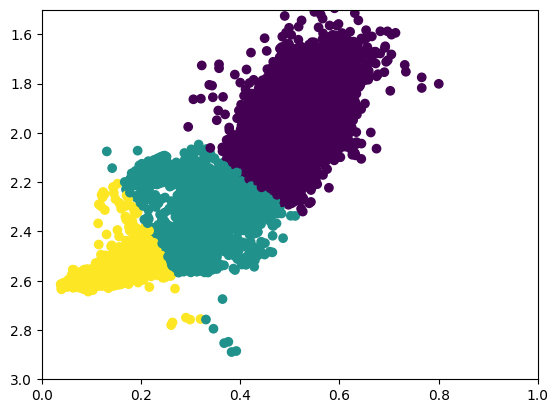

In [57]:
#plot the results
plt.scatter(x = df["NPHI"], y = df["RHOB"], c=df["kmeans_3"])
plt.xlim(-0,1, 1)
plt.ylim(3, 1.5)
plt.show()

In [58]:
# Comparing datas for dif k value

for k in range(1,6):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df[["NPHI_T", "RHOB_T"]])
    df[f'kmeans_{k}'] = kmeans.labels_
df

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC,RHOB_T,GR_T,DEPTH_MD_T,NPHI_T,PEF_T,DTC_T,kmeans_3,kmeans_1,kmeans_2,kmeans_4,kmeans_5
4238,1.774626,55.892757,1138.704,0.765867,1.631495,147.837677,-1.491843,-0.179292,-1.731605,2.523654,-1.255364,0.869531,0,0,0,0,0
4239,1.800986,60.929138,1138.856,0.800262,1.645080,142.382431,-1.387067,-0.010859,-1.731322,2.770744,-1.247886,0.690042,0,0,0,0,0
4240,1.817696,62.117264,1139.008,0.765957,1.645873,138.258331,-1.320646,0.028875,-1.731038,2.524300,-1.247450,0.554350,0,0,0,0,0
4241,1.829333,61.010860,1139.160,0.702521,1.620216,139.198914,-1.274390,-0.008126,-1.730754,2.068584,-1.261572,0.585297,0,0,0,0,0
4242,1.813854,58.501236,1139.312,0.639708,1.504854,144.290085,-1.335919,-0.092056,-1.730470,1.617342,-1.325067,0.752808,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16435,2.468236,90.537521,2993.256,0.341534,4.699200,86.474564,1.265151,0.979338,1.730512,-0.524699,0.433103,-1.149449,1,0,1,1,4
16436,2.457519,88.819122,2993.408,0.351085,4.699200,86.187599,1.222550,0.921870,1.730796,-0.456081,0.433103,-1.158891,1,0,1,1,4
16437,2.429228,92.128922,2993.560,0.364982,4.699200,87.797836,1.110101,1.032560,1.731080,-0.356250,0.433103,-1.105910,1,0,1,1,4
16438,2.425479,95.870255,2993.712,0.367323,5.224292,88.108452,1.095199,1.157682,1.731363,-0.339430,0.722114,-1.095690,1,0,1,1,4


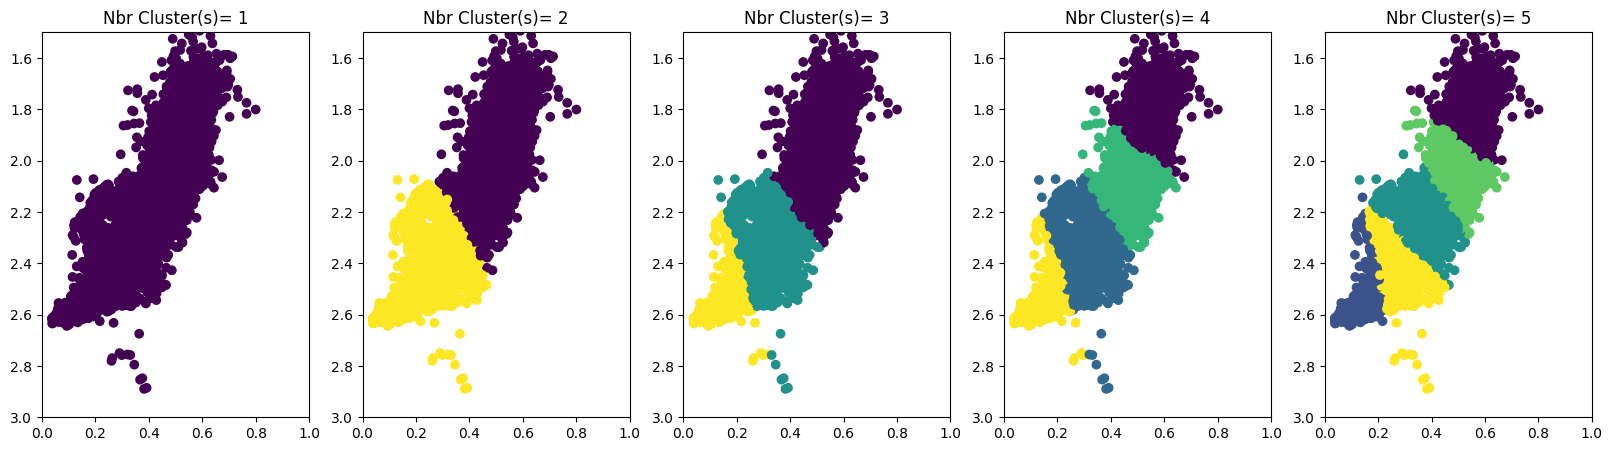

In [69]:
fig, axis  = plt.subplots(nrows = 1, ncols = 5, figsize = (20,5))

for i, ax in enumerate(fig.axes, start=1):
    ax.scatter(x = df["NPHI"], y = df["RHOB"], c=df[f"kmeans_{i}"])
    ax.set_xlim(0, 1)
    ax.set_ylim(3, 1.5)
    ax.set_title(f"Nbr Cluster(s)= {i}")